In [1]:
# Import required libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter warnings
warnings.filterwarnings('ignore')

# Set color palettes
color_palette = sns.color_palette('flare')
pp_double_palette = sns.color_palette(['#37306B', '#D27685'])
large_palette = sns.color_palette(['#EA698B', '#D27685', '#D55D92', '#C05299', '#AC46A1', '#973AA8',
                                   '#822FAF', '#6D23B6', '#6411AD', '#571089', '#47126B', '#D27685'])

# Set default plotting style
sns.set(style="ticks", rc={"axes.spines.top": False, "axes.spines.right": False})


# Data Exploration

| Variable | Description                                                          |
|----------|----------------------------------------------------------------------|
| survival | Survival -> 0 = No, 1 = Yes                                          |
| pclass   | Ticket class -> 1 = Upper, 2 = Middle, 3 = Lower                      |
| sex      | Sex of passenger                                                     |
| Age      | Age in years                                                         |
| sibsp    | # of siblings / spouses aboard the Titanic                           |
| parch    | # of parents / children aboard the Titanic                           |
| ticket   | Ticket number                                                        |
| fare     | Passenger fare                                                       |
| cabin    | Cabin number                                                         |
| embarked | Port of Embarkation -> C = Cherbourg, Q = Queenstown, S = Southampton |


In [2]:
# Load the Titanic training data
data = pd.read_csv('/kaggle/input/titanic/train.csv')

# Load the Titanic test data
X_test = pd.read_csv('/kaggle/input/titanic/test.csv')

print("Training data:")
display(data.head())

print("Test data:")
display(X_test.head())

Training data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Test data:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
print('shape of the training data: ', data.shape)
print('shape of the test data: ', X_test.shape)

shape of the training data:  (891, 12)
shape of the test data:  (418, 11)


In [4]:
data.info(); data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


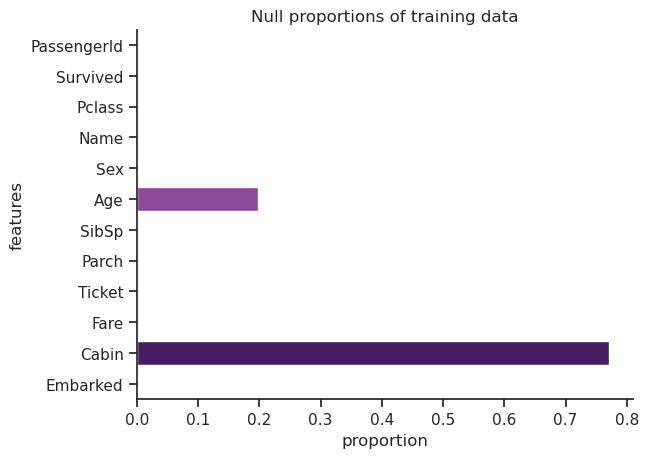

In [5]:
nulls_plt = sns.barplot(x=data.isna().sum() / len(data), y=data.columns, palette=large_palette)
nulls_plt.set(title='Null proportions of training data', xlabel='proportion', ylabel='features')

plt.show(block=False)

The "Cabin" feature in the training dataset has a large number of null values. This is not unusual, as only first class passengers were assigned cabins. Therefore, we can fill the null values with the string "unknown".

However, approximately 20% of the "Age" column is also missing, and this is a numerical value. It would not be appropriate to fill these missing values with "unknown" or any other string. While the usual practice is to fill missing numerical values with the mean or median value, doing so may result in significant information loss given that 20% of the data is missing. As a result, I have decided to search for missing data in the "Age" and "Embarked" columns and fill them accordingly.

If you would like to access the updated dataset, you can find it at the following link: https://www.kaggle.com/datasets/keremozturk/titanic-updated

In [6]:
X_train = pd.read_csv('/kaggle/input/titanic-updated/train.csv')
y_train = X_train['Survived']

X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


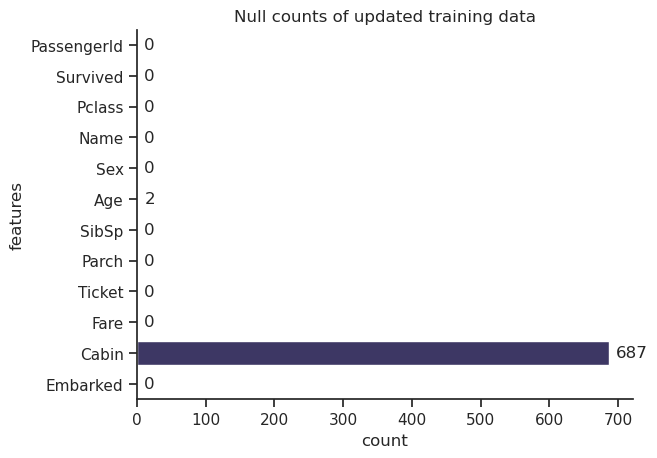

In [7]:
nulls_plt = sns.barplot(x=X_train.isna().sum(), y=X_train.columns, palette=pp_double_palette)
nulls_plt.set(title='Null counts of updated training data',
              xlabel='count', ylabel='features')

for patch in nulls_plt.patches:
    x = patch.get_width()
    y = patch.get_y() + patch.get_height() / 2
    nulls_plt.annotate(f'{x:.0f}', (x + 10, y), ha='left', va='center')

## Preprocessing of data and Feature engineering

In [8]:
# Save PassengerId column for submission
p_id = X_test['PassengerId']

# Drop rows with missing Age values from training data
X_train.dropna(subset=['Age'], inplace=True, axis=0)

# Define function to extract title from name
title_list = ['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev', 'Dr', 'Ms', 'Mlle', 'Col', 'Capt', 'Mme', 'Countess', 'Don', 'Jonkheer']
def get_title(name):
    for title in title_list:
        if title in name:
            return title

# Define function to extract cabin category from cabin number
def get_cabin(cabin):
    for letter in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']:
        if letter in cabin:
            return letter
    return 'none'

# Extract title and cabin category from name and cabin columns
X_train['Title'] = X_train['Name'].apply(get_title)
X_test['Title'] = X_test['Name'].apply(get_title)
X_train['Cabin'].fillna('unknown', inplace=True)
X_train['Cabin_cat'] = X_train['Cabin'].apply(get_cabin)
X_test['Cabin'].fillna('unknown', inplace=True)
X_test['Cabin_cat'] = X_test['Cabin'].apply(get_cabin)

# Combine sibling/spouse and parent/child counts into family size feature
X_train['Family_size'] = X_train['SibSp'] + X_train['Parch']
X_test['Family_size'] = X_test['SibSp'] + X_test['Parch']

# Drop unnecessary columns
X_train = X_train.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1)
X_test = X_test.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1)

X_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_cat,Family_size
0,0,3,male,22.0,1,0,7.2500,S,Mr,none,1
1,1,1,female,38.0,1,0,71.2833,C,Mrs,C,1
2,1,3,female,26.0,0,0,7.9250,S,Miss,none,0
3,1,1,female,35.0,1,0,53.1000,S,Mrs,C,1
4,0,3,male,35.0,0,0,8.0500,S,Mr,none,0


In [9]:
print('Number of missing values in training data: ', X_train.isna().sum().sum())

Number of missing values in training data:  0


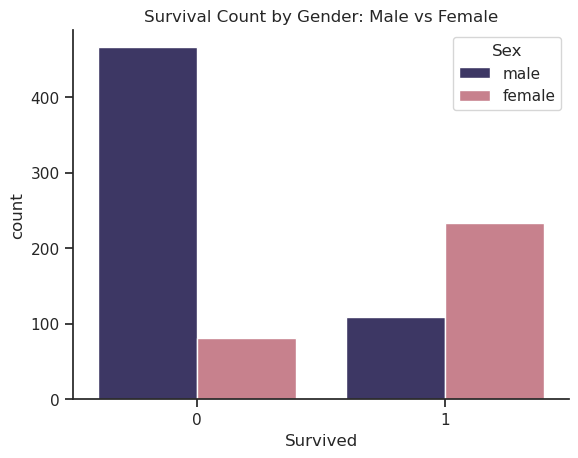

In [10]:
sex_plot = sns.countplot(data=X_train,
                         x='Survived', hue='Sex',
                         palette=pp_double_palette,
                        )

sex_plot.set(title='Survival Count by Gender: Male vs Female')
plt.show(block=False)

This graph shows that females had a higher rate of survival compared to males. While there is a large difference in the number of observations between the "survived" and "did not survive" classes, particularly for the "survived" class where there are many more observations with a value of 1 than 0, we cannot consider this to be a class imbalance since the class labels are not evenly distributed.

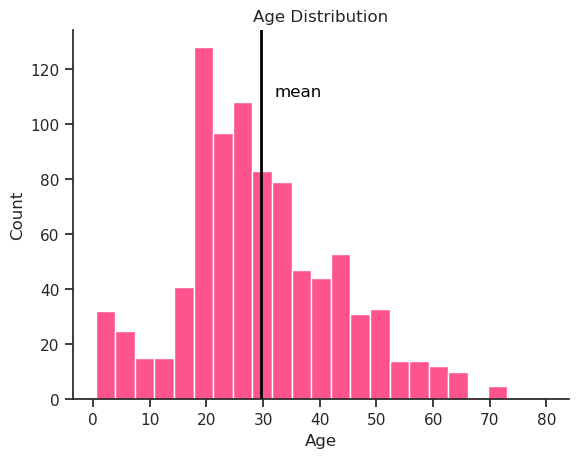

In [11]:
age_hist = sns.histplot(X_train['Age'], color='#ff1a66')
age_hist.set(title='Age Distribution')

plt.axvline(x=X_train['Age'].mean(), color='black', lw=2)
plt.text(x=32, y=110, s='mean', color='black')
plt.show(block=False)

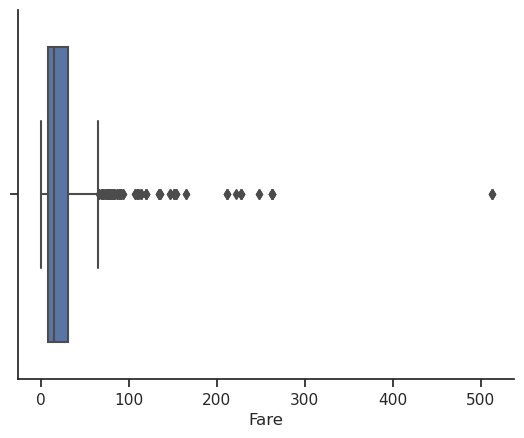

In [12]:
sns.boxplot(data=X_train, x='Fare')
plt.show(block=False)

There are too many outliers for the Passenger Fare.

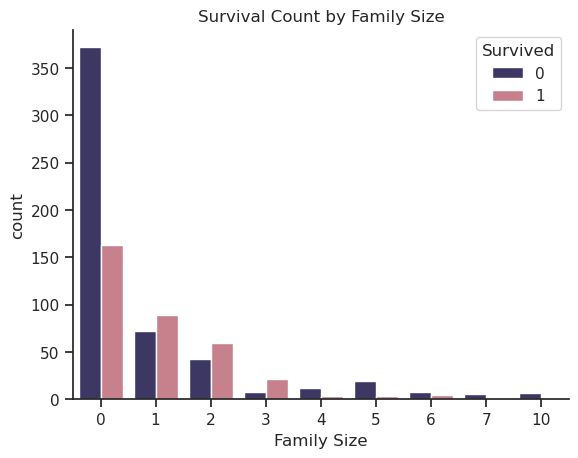

In [13]:
fs_plot = sns.countplot(data=X_train,
                        x='Family_size',
                        hue='Survived',
                        palette=pp_double_palette)

fs_plot.set(title='Survival Count by Family Size', xlabel='Family Size')
plt.show(block=False)

Those with 1, 2 or 3 family members other than themselves are more likely to survive.

In [14]:
# Separate the target variable from the features in the training data
y_train = X_train['Survived']
X_train.drop('Survived', axis=1, inplace=True)

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

# Define the categorical columns to be one-hot encoded
cat_cols = ['Sex', 'Cabin_cat', 'Embarked', 'Title']

# Define the ColumnTransformer object to encode the categorical columns
ct = ColumnTransformer(
    [('encoder', OneHotEncoder(categories='auto', handle_unknown='ignore', sparse=False), cat_cols)],
    remainder='passthrough',
    verbose_feature_names_out=False
)

# Fit and transform the training data using the ColumnTransformer
encoded_train = ct.fit_transform(X_train)
X_train = pd.DataFrame(encoded_train, columns=ct.get_feature_names_out())

# Transform the test data using the fitted ColumnTransformer
encoded_test = ct.transform(X_test)
X_test = pd.DataFrame(encoded_test, columns=ct.get_feature_names_out())

In [16]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns=X_test.columns)

## Feature Selection

In [17]:
!pip install BorutaShap --quiet

from BorutaShap import BorutaShap

# Create the BorutaShap feature selector
selector = BorutaShap(importance_measure='shap', classification=True)

# Fit the selector to the training data
selector.fit(X=X_train, y=y_train, n_trials=100, sample=False, verbose=True)

  0%|          | 0/100 [00:00<?, ?it/s]

9 attributes confirmed important: ['Sex_female', 'Title_Mr', 'Title_Mrs', 'Fare', 'Age', 'Family_size', 'Sex_male', 'Pclass', 'Cabin_cat_none']
26 attributes confirmed unimportant: ['Cabin_cat_C', 'Title_Capt', 'Cabin_cat_G', 'Embarked_Q', 'Title_Mlle', 'Cabin_cat_D', 'Title_Dr', 'Title_Miss', 'Title_Col', 'Title_Don', 'Embarked_C', 'Cabin_cat_E', 'Parch', 'Title_Countess', 'Title_Ms', 'Cabin_cat_A', 'Title_Jonkheer', 'Cabin_cat_T', 'SibSp', 'Title_Major', 'Cabin_cat_F', 'Cabin_cat_B', 'Title_Rev', 'Embarked_S', 'Title_Master', 'Title_Mme']
0 tentative attributes remains: []


In [18]:
X_train.drop(selector.features_to_remove, axis=1, inplace=True)
X_test.drop(selector.features_to_remove, axis=1, inplace=True)

# Model Selection

We have imported most of the important classification algorithms below, I will examine the hyperparameters of all algorithms graphically and try to reach the best models, this process will take a long time.

In [19]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, KFold, learning_curve

In [20]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
kfold5 = KFold(n_splits=5, shuffle=True, random_state=42)

def cvs(model):
    print(pd.Series(cross_val_score(model, X_train, y_train, scoring='accuracy', cv=kfold)).describe())
    
def plot_learning_curve(model):
    train_sizes, train_scores, valid_scores = learning_curve(model, X_train, y_train,
                                                             train_sizes=np.linspace(0.1, 1.0, 25),
                                                             cv=kfold5, scoring='accuracy')
    train_errors = train_scores.mean(axis=1)
    valid_errors = valid_scores.mean(axis=1)
    
    lc_plot = sns.lineplot(x=train_sizes, y=train_errors, color="#ff1a66", linewidth=2, label='training')
    lc_plot = sns.lineplot(x=train_sizes, y=valid_errors, color="#47126B", linewidth=2, label='validation')
    lc_plot.set(title='Learning Curve', xlabel='Size of trainig set', ylabel='CV Score')
    plt.show(block=False)

## Fine Tuning XGBClassifier

count    10.000000
mean      0.820059
std       0.020898
min       0.797753
25%       0.800562
50%       0.814607
75%       0.839888
max       0.852273
dtype: float64


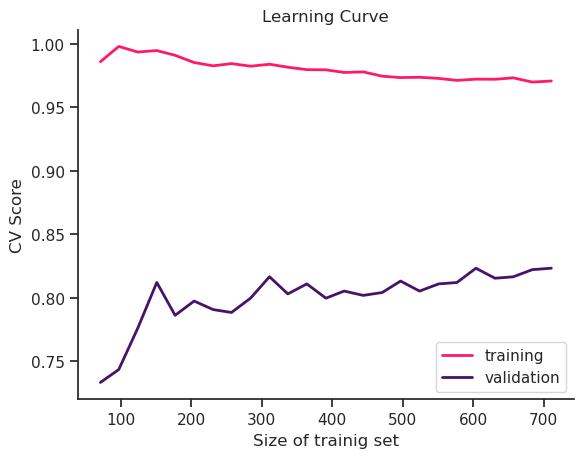

In [21]:
xgbc = XGBClassifier(random_state=42)

cvs(xgbc); plot_learning_curve(xgbc)

The current model appears to be overfitting as indicated by the convergence of the learning curves. To address this issue, one possible solution could be to increase the amount of data available for training. However, since we do not have additional data to work with, we will instead focus on fine-tuning the hyperparameters of the model.

max value is 0.02


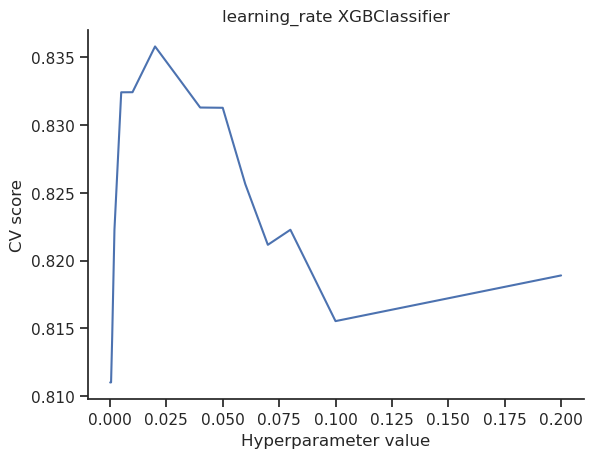

In [22]:
curve = []
hp_vals = [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2]
for val in hp_vals:
    model = XGBClassifier(learning_rate=val, n_estimators=200, random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='learning_rate XGBClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show(block=False)

max value is 2


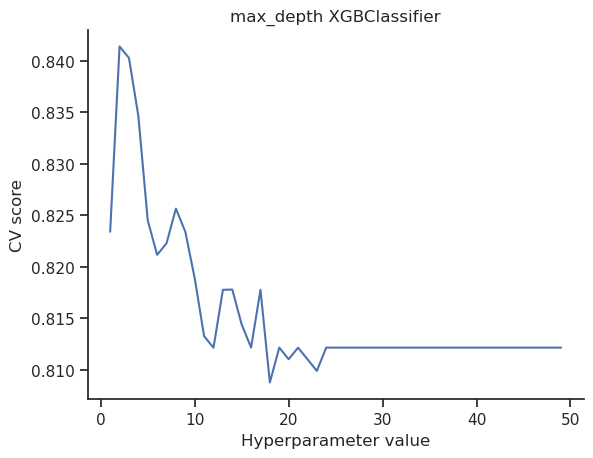

In [23]:
curve = []
hp_vals = range(1, 50)
for val in hp_vals:
    model = XGBClassifier(max_depth=val,
                          learning_rate=0.07,
                          n_estimators=200,
                          random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='max_depth XGBClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show(block=False)

max value is 1


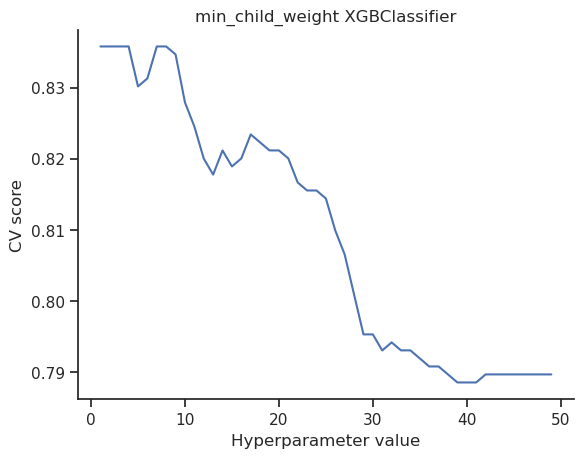

In [24]:
curve = []
hp_vals = range(1, 50)
for val in hp_vals:
    model = XGBClassifier(min_child_weight=val,
                          max_depth=2,
                          learning_rate=0.02,
                          n_estimators=200,
                          random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='min_child_weight XGBClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show(block=False)

max value is 0


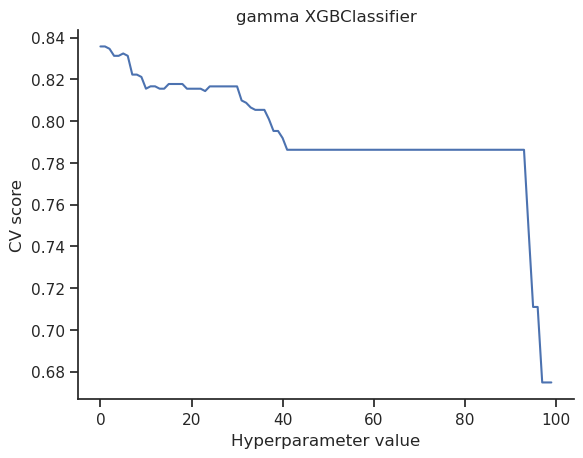

In [25]:
curve = []
hp_vals = range(0, 100)
for val in hp_vals:
    model = XGBClassifier(gamma=val,
                          min_child_weight=1,
                          max_depth=2,
                          learning_rate=0.02,
                          n_estimators=200,
                          random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='gamma XGBClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show(block=False)

max value is 0


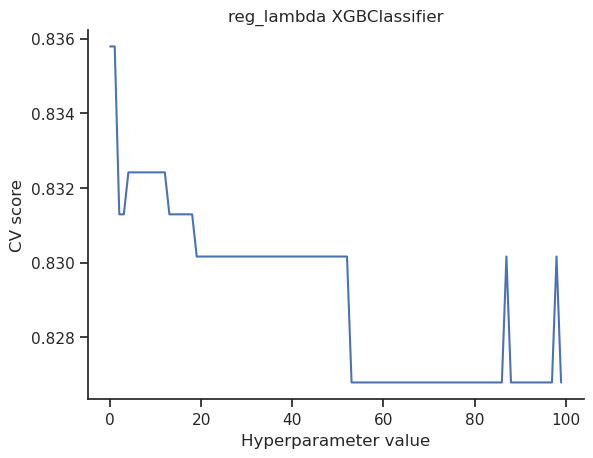

In [26]:
curve = []
hp_vals = range(0, 100)
for val in hp_vals:
    model = XGBClassifier(reg_lambda=val,
                          gamma=0,
                          min_child_weight=1,
                          max_depth=2,
                          learning_rate=0.02,
                          n_estimators=200,
                          random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='reg_lambda XGBClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show(block=False)

max value is 0


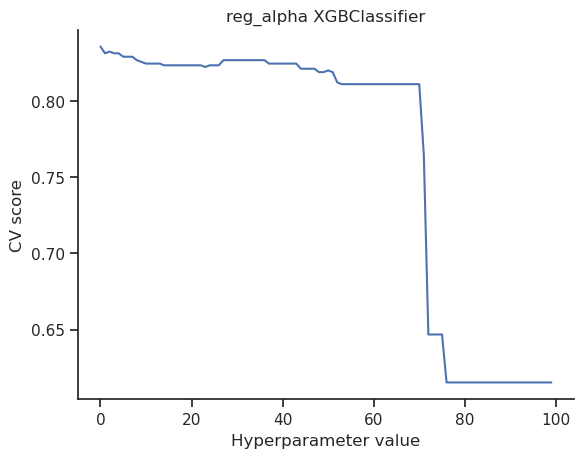

In [27]:
curve = []
hp_vals = range(0, 100)
for val in hp_vals:
    model = XGBClassifier(reg_alpha=val,
                          reg_lambda=1,
                          gamma=0,
                          min_child_weight=1,
                          max_depth=2,
                          learning_rate=0.02,
                          n_estimators=200,
                          random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='reg_alpha XGBClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show(block=False)

count    10.000000
mean      0.835751
std       0.031987
min       0.797753
25%       0.811287
50%       0.831461
75%       0.867978
max       0.876404
dtype: float64


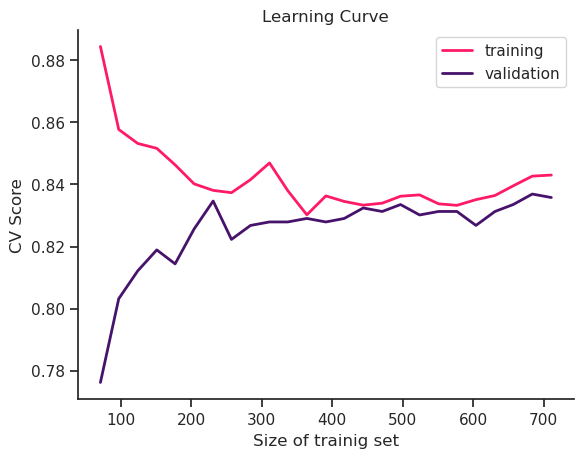

In [28]:
xgbc = XGBClassifier(n_estimators=200,
                     reg_alpha=0,
                     reg_lambda=1,
                     gamma=0,
                     min_child_weight=1,
                     max_depth=2,
                     learning_rate=0.02,
                     random_state=42)

cvs(xgbc); plot_learning_curve(xgbc)

## Fine Tuning RandomForestClassifier

count    10.000000
mean      0.818884
std       0.031621
min       0.764045
25%       0.807361
50%       0.814607
75%       0.839888
max       0.876404
dtype: float64


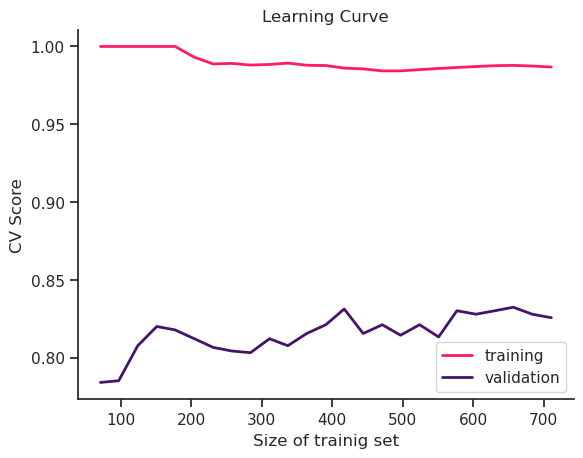

In [29]:
random_forest = RandomForestClassifier(random_state=42)

cvs(random_forest); plot_learning_curve(random_forest)

max value is 8


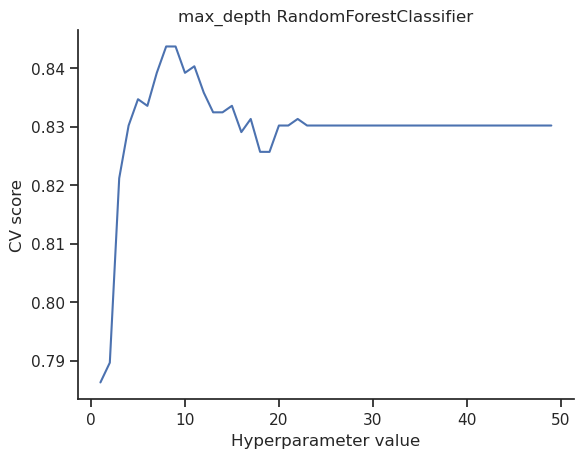

In [30]:
curve = []
hp_vals = range(1, 50)
for val in hp_vals:
    model = RandomForestClassifier(max_depth=val,
                                   n_estimators=200,
                                   random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='max_depth RandomForestClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show(block=False)

max value is 3


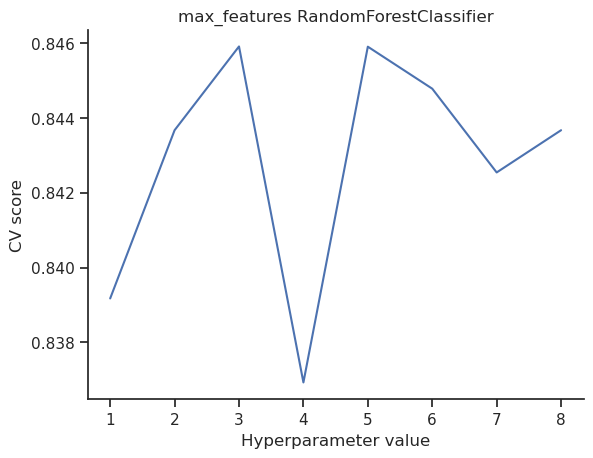

In [31]:
curve = []
hp_vals = range(1, 9)
for val in hp_vals:
    model = RandomForestClassifier(max_features=val,
                                   max_depth=8,
                                   n_estimators=200,
                                   random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='max_features RandomForestClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show(block=False)

max value is 1


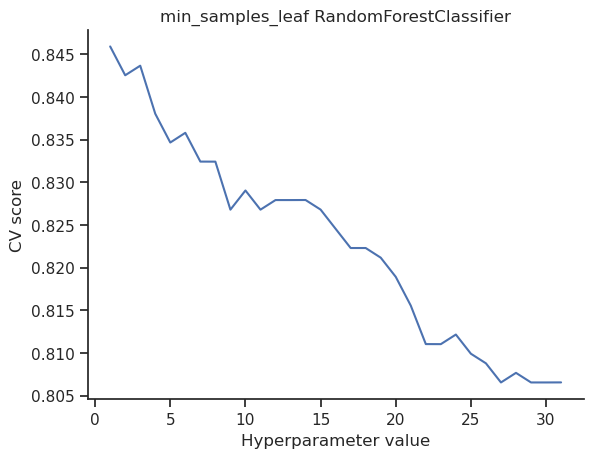

In [32]:
curve = []
hp_vals = range(1, 32)
for val in hp_vals:
    model = RandomForestClassifier(min_samples_leaf=val,
                                   max_features=3,
                                   max_depth=8,
                                   n_estimators=200,
                                   random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='min_samples_leaf RandomForestClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show(block=False)

max value is 45


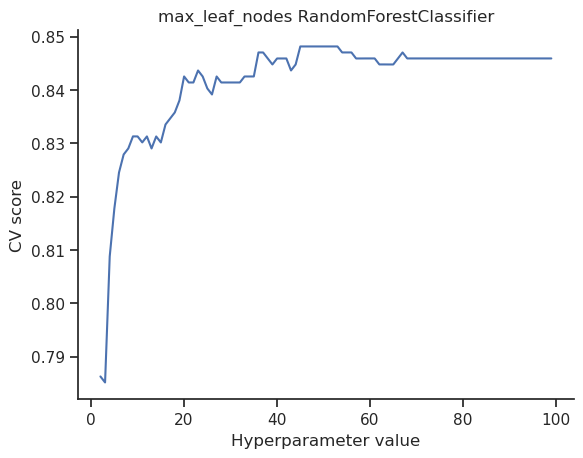

In [33]:
curve = []
hp_vals = range(2, 100)
for val in hp_vals:
    model = RandomForestClassifier(max_leaf_nodes=val,
                                   min_samples_leaf=1,
                                   max_features=3,
                                   max_depth=8,
                                   n_estimators=200,
                                   random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='max_leaf_nodes RandomForestClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show(block=False)

max value is 3


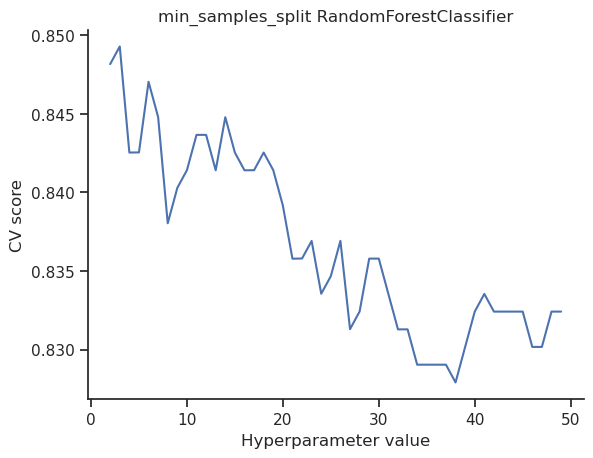

In [34]:
curve = []
hp_vals = range(2, 50)
for val in hp_vals:
    model = RandomForestClassifier(min_samples_split=val,
                                   max_leaf_nodes=45,
                                   min_samples_leaf=1,
                                   max_features=3,
                                   max_depth=8,
                                   n_estimators=200,
                                   random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='min_samples_split RandomForestClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show(block=False)

count    10.000000
mean      0.834678
std       0.022278
min       0.797753
25%       0.825843
50%       0.842697
75%       0.842697
max       0.863636
dtype: float64


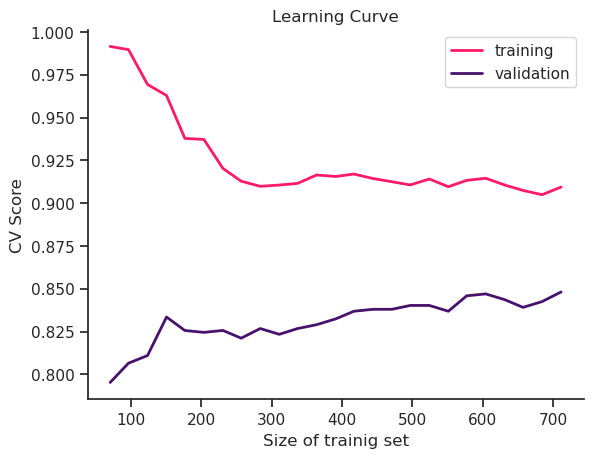

In [35]:
random_forest = RandomForestClassifier(min_samples_split=3,
                                       max_leaf_nodes=45,
                                       min_samples_leaf=1,
                                       max_features=3,
                                       max_depth=8,
                                       n_estimators=200,
                                       random_state=42)

cvs(random_forest); plot_learning_curve(random_forest)

## Fine Tuning LGBMClassifier

count    10.000000
mean      0.816637
std       0.024957
min       0.775281
25%       0.800019
50%       0.820225
75%       0.839888
max       0.842697
dtype: float64


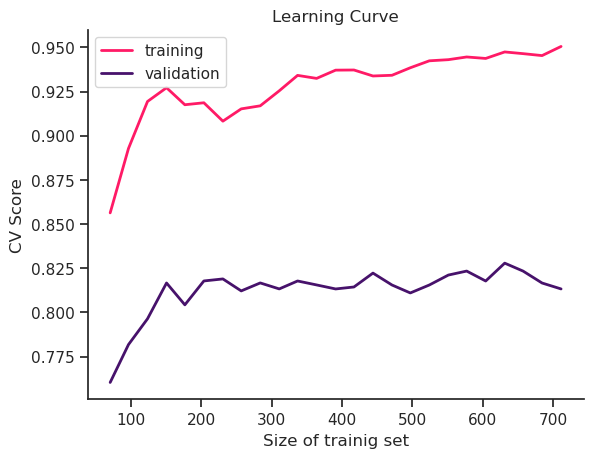

In [36]:
lgbm = LGBMClassifier(random_state=42)
cvs(lgbm); plot_learning_curve(lgbm)

max value is 0.03


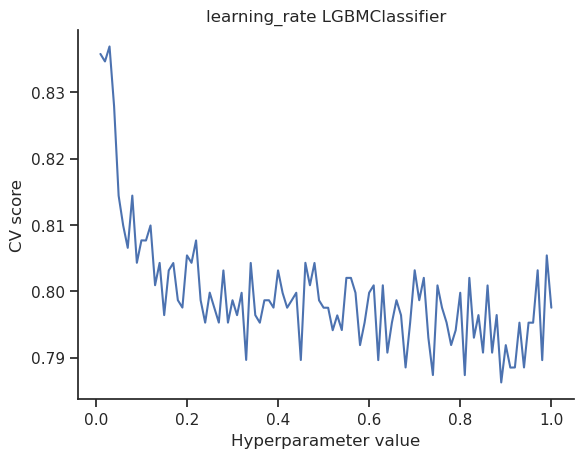

In [37]:
curve = []
hp_vals = np.linspace(0.01, 1, 100)
for val in hp_vals:
    model = LGBMClassifier(learning_rate=val,
                           n_estimators=200 ,
                           random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='learning_rate LGBMClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show(block=False)

max value is 8


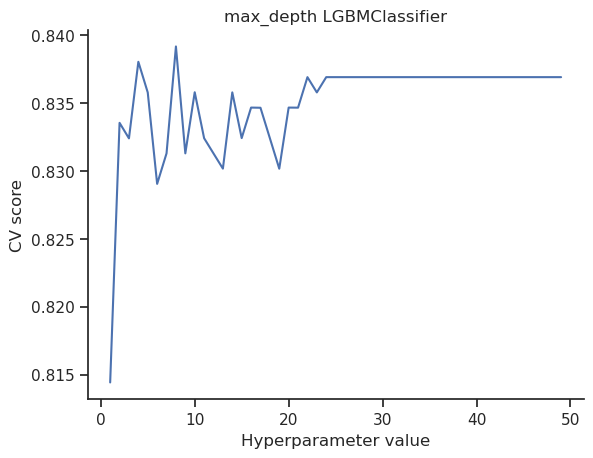

In [38]:
curve = []
hp_vals = range(1, 50)
for val in hp_vals:
    model = LGBMClassifier(max_depth=val,
                           learning_rate=0.03,
                           n_estimators=200,
                           random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='max_depth LGBMClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show(block=False)

max value is 5


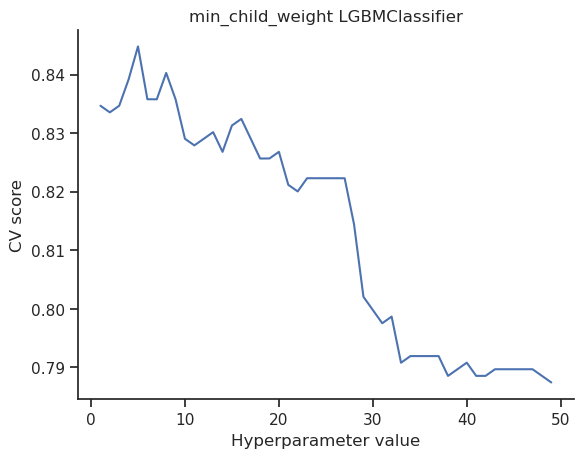

In [39]:
curve = []
hp_vals = range(1, 50)
for val in hp_vals:
    model = LGBMClassifier(min_child_weight=val,
                           max_depth=8,
                           learning_rate=0.03,
                           n_estimators=200,
                           random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='min_child_weight LGBMClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show(block=False)

max value is 10


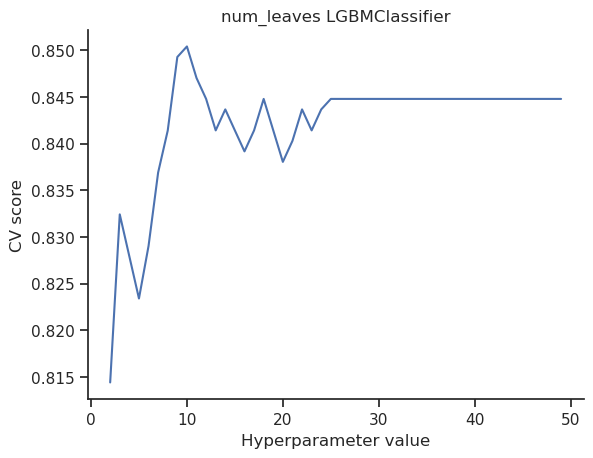

In [40]:
curve = []
hp_vals = range(2, 50)
for val in hp_vals:
    model = LGBMClassifier(num_leaves=val,
                           min_child_weight=5,
                           max_depth=8,
                           learning_rate=0.03,
                           n_estimators=200,
                           random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='num_leaves LGBMClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show(block=False)

max value is 0


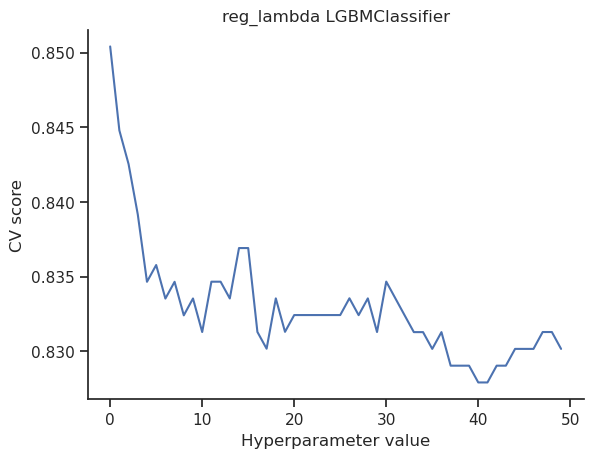

In [41]:
curve = []
hp_vals = range(0, 50)
for val in hp_vals:
    model = LGBMClassifier(reg_lambda=val,
                           num_leaves=10,
                           min_child_weight=5,
                           max_depth=8,
                           learning_rate=0.03,
                           n_estimators=200,
                           random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='reg_lambda LGBMClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show(block=False)

max value is 0


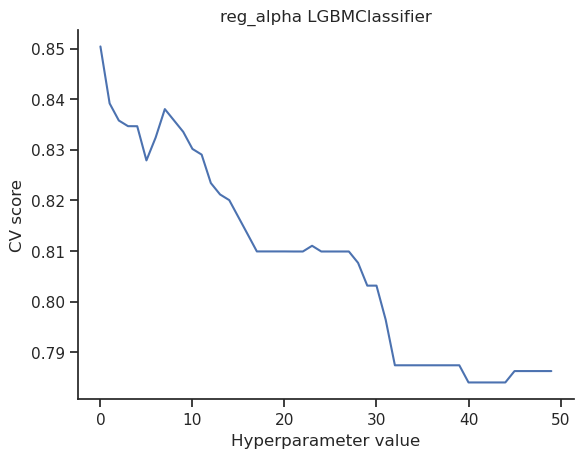

In [42]:
curve = []
hp_vals = range(0, 50)
for val in hp_vals:
    model = LGBMClassifier(reg_alpha=val,
                           reg_lambda=0,
                           num_leaves=10,
                           min_child_weight=5,
                           max_depth=8,
                           learning_rate=0.03,
                           n_estimators=200,
                           random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='reg_alpha LGBMClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show(block=False)

count    10.000000
mean      0.834665
std       0.027931
min       0.775281
25%       0.831461
50%       0.842697
75%       0.853518
max       0.865169
dtype: float64


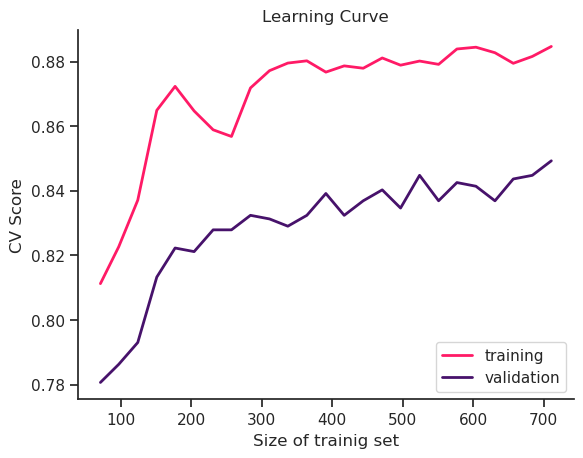

In [43]:
lgbm = LGBMClassifier(reg_alpha=0,
                      reg_lambda=0,
                      num_leaves=10,
                      min_child_weight=5,
                      max_depth=8,
                      learning_rate=0.03,
                      n_estimators=200,
                      random_state=42)

cvs(lgbm); plot_learning_curve(lgbm)

## Fine Tuning CatBoostClassifier
After attempting to optimize the CatBoostClassifier, I observed that its performance worsened and the optimization process took longer. Therefore, I have decided to use the default version, as it appears to be sufficient for my needs.

count    10.000000
mean      0.841394
std       0.027238
min       0.797753
25%       0.823034
50%       0.841803
75%       0.862360
max       0.876404
dtype: float64


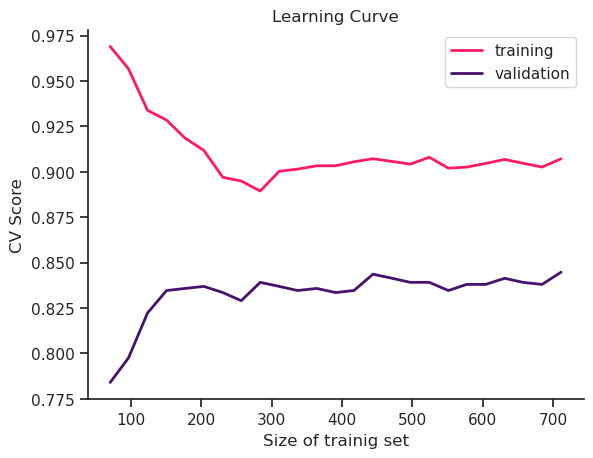

In [44]:
cb = CatBoostClassifier(random_state=42, verbose=0)

cvs(cb); plot_learning_curve(cb)

## Fine Tuning GradientBoostingClassifier

count    10.000000
mean      0.824540
std       0.026461
min       0.775281
25%       0.811798
50%       0.825843
75%       0.838547
max       0.865169
dtype: float64


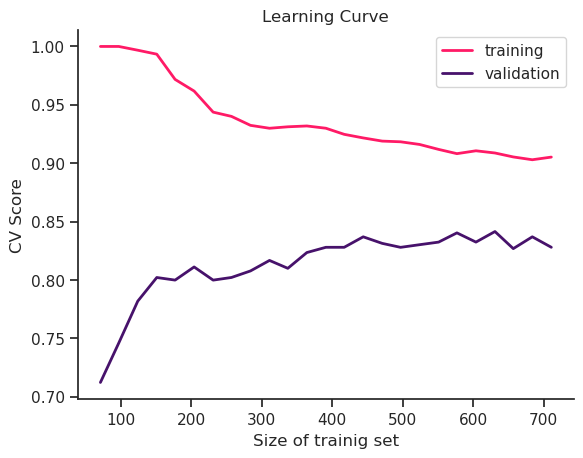

In [45]:
gbc = GradientBoostingClassifier(random_state=42)

cvs(gbc); plot_learning_curve(gbc)

max value is 200


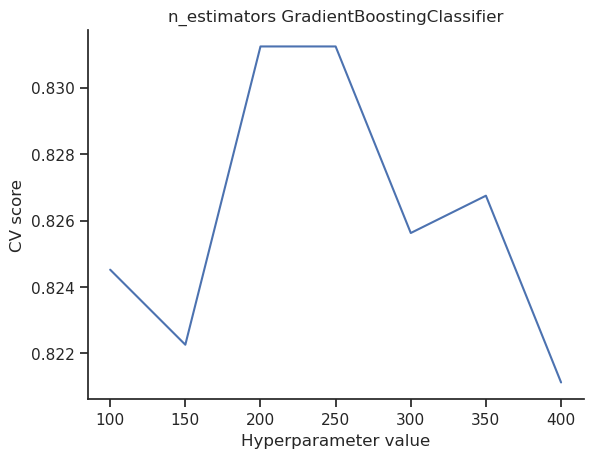

In [46]:
curve = []
hp_vals = [100, 150, 200, 250, 300, 350, 400]
for val in hp_vals:
    model = GradientBoostingClassifier(n_estimators=val,
                                       random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='n_estimators GradientBoostingClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show(block=False)

max value is 3


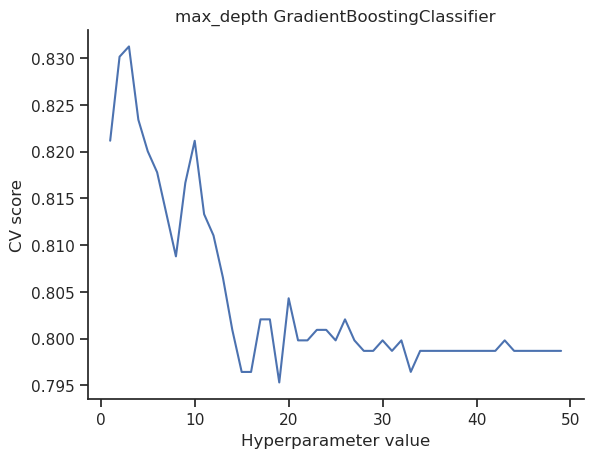

In [47]:
curve = []
hp_vals = range(1, 50)
for val in hp_vals:
    model = GradientBoostingClassifier(max_depth=val,
                                       n_estimators=200,
                                       random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='max_depth GradientBoostingClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show(block=False)

max value is 2


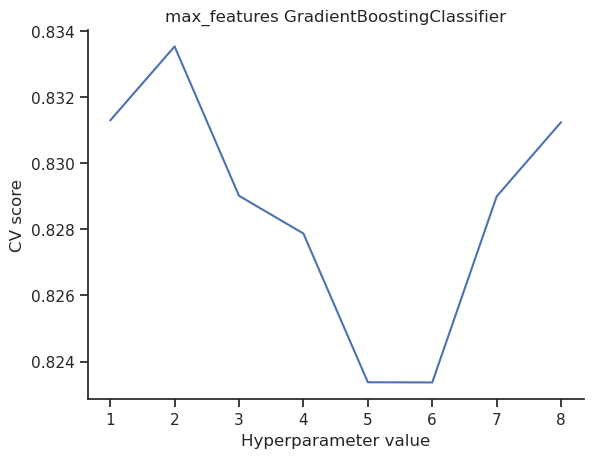

In [48]:
curve = []
hp_vals = range(1, 9)
for val in hp_vals:
    model = GradientBoostingClassifier(max_features=val,
                                       max_depth=3,
                                       n_estimators=200,
                                       random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='max_features GradientBoostingClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show(block=False)

max value is 28


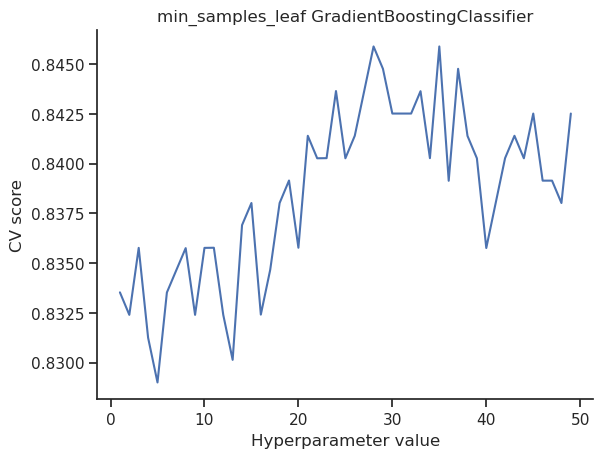

In [49]:
curve = []
hp_vals = range(1, 50)
for val in hp_vals:
    model = GradientBoostingClassifier(min_samples_leaf=val,
                                       max_features=2,
                                       max_depth=3,
                                       n_estimators=200,
                                       random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='min_samples_leaf GradientBoostingClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show(block=False)

max value is 8


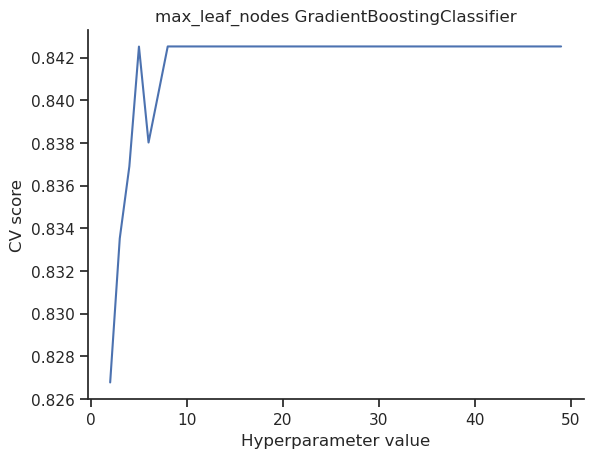

In [50]:
curve = []
hp_vals = range(2, 50)
for val in hp_vals:
    model = GradientBoostingClassifier(max_leaf_nodes=val,
                                       min_samples_leaf=28,
                                       max_features=2,
                                       max_depth=3,
                                       n_estimators=200,
                                       random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='max_leaf_nodes GradientBoostingClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show(block=False)

count    10.000000
mean      0.839160
std       0.022389
min       0.808989
25%       0.823034
50%       0.842697
75%       0.849879
max       0.876404
dtype: float64


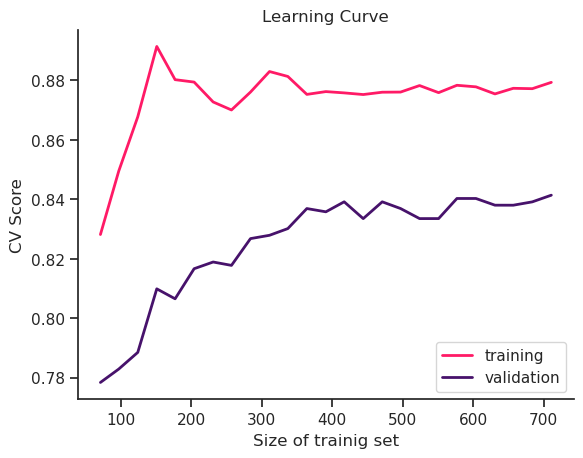

In [51]:
gbc = GradientBoostingClassifier(max_leaf_nodes=8,
                                 min_samples_leaf=28,
                                 max_features=2,
                                 max_depth=3,
                                 n_estimators=200,
                                 random_state=42)

cvs(gbc); plot_learning_curve(gbc)

## Fine Tuning LogisticRegression

count    10.000000
mean      0.812142
std       0.032704
min       0.764045
25%       0.789326
50%       0.813521
75%       0.828652
max       0.865169
dtype: float64


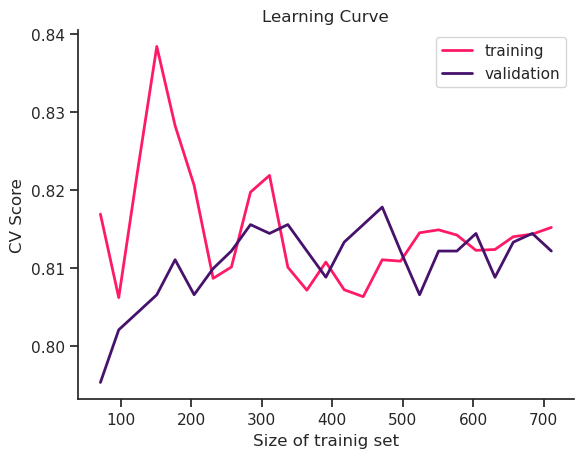

In [52]:
log_reg = LogisticRegression(random_state=42)

cvs(log_reg); plot_learning_curve(log_reg)

max value is 0.40000000000000013


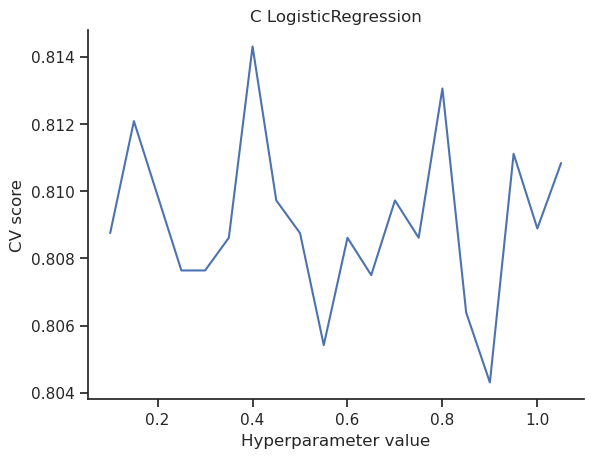

In [53]:
curve = []
hp_vals = np.arange(0.1, 1.1, 0.05)
for val in hp_vals:
    model = LogisticRegression(C=val,
                               random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=KFold(n_splits=100, shuffle=True, random_state=42), scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='C LogisticRegression', xlabel='Hyperparameter value', ylabel='CV score')
plt.show(block=False)

count    10.000000
mean      0.812142
std       0.035184
min       0.752809
25%       0.789326
50%       0.813521
75%       0.831461
max       0.865169
dtype: float64


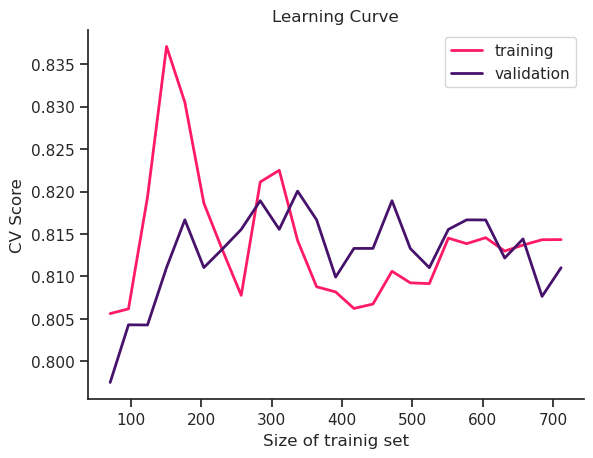

In [54]:
log_reg = LogisticRegression(C=0.4, random_state=42)

cvs(log_reg); plot_learning_curve(log_reg)

## Fine Tuning SGDClassifier

count    10.000000
mean      0.745735
std       0.062502
min       0.651685
25%       0.705375
50%       0.747191
75%       0.772472
max       0.865169
dtype: float64


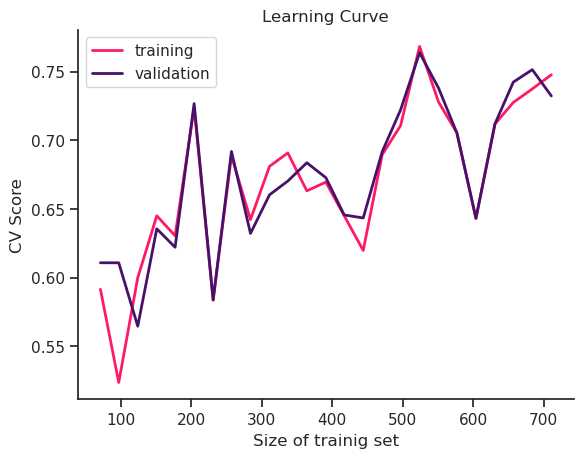

In [55]:
sgdc = SGDClassifier(random_state=42)

cvs(sgdc); plot_learning_curve(sgdc)

max value is l1


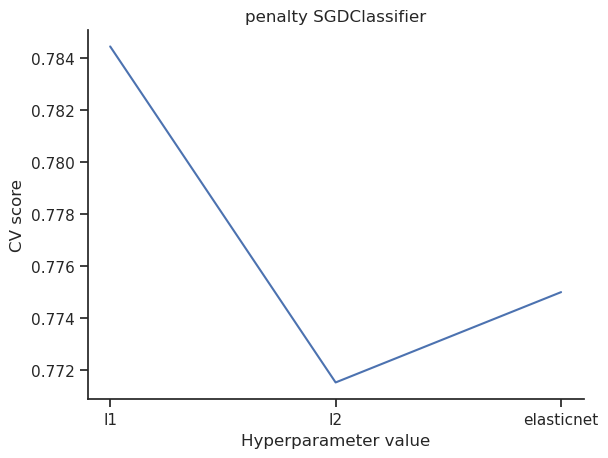

In [56]:
curve = []
hp_vals = ['l1', 'l2', 'elasticnet']
for val in hp_vals:
    model = make_pipeline(StandardScaler(), SGDClassifier(penalty=val, random_state=42))
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=KFold(n_splits=100, shuffle=True, random_state=42), scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='penalty SGDClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show(block=False)

max value is 0.002


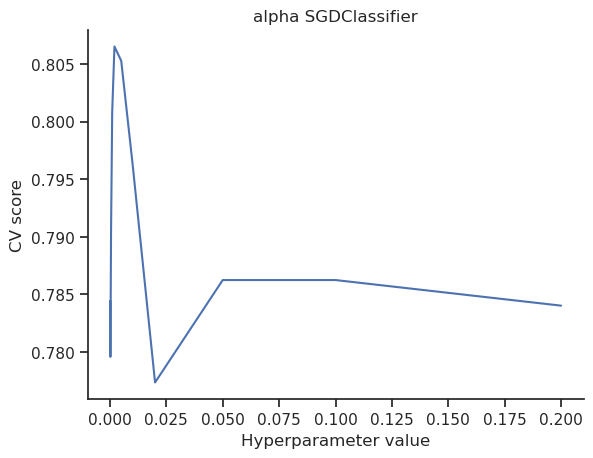

In [57]:
curve = []
hp_vals = [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2]
for val in hp_vals:
    model = make_pipeline(StandardScaler(), SGDClassifier(alpha=val, penalty='l1', random_state=42))
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=KFold(n_splits=100, shuffle=True, random_state=42), scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='alpha SGDClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show(block=False)

count    10.000000
mean      0.807623
std       0.028954
min       0.775281
25%       0.787506
50%       0.797753
75%       0.828652
max       0.865169
dtype: float64


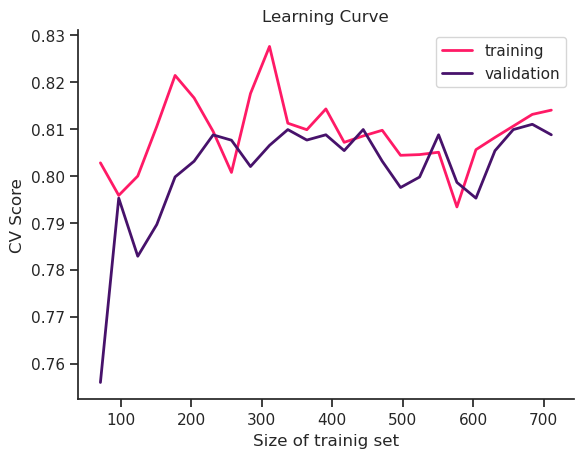

In [58]:
sgdc = make_pipeline(StandardScaler(), SGDClassifier(alpha=0.002, penalty='l1', random_state=42))

cvs(sgdc); plot_learning_curve(sgdc)

## Fine Tuning SVC

count    10.000000
mean      0.682776
std       0.049719
min       0.617978
25%       0.639524
50%       0.685393
75%       0.716292
max       0.764045
dtype: float64


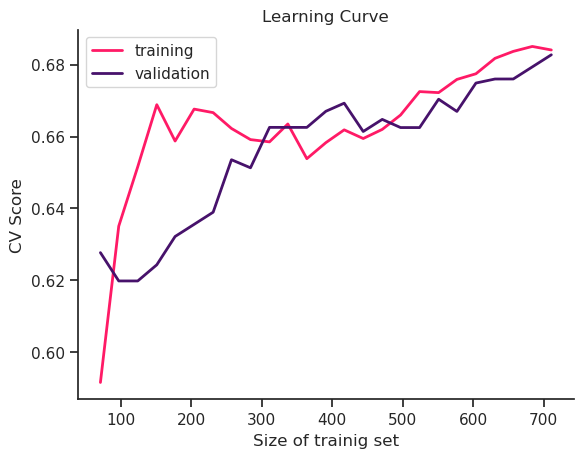

In [59]:
svc_clf = SVC(random_state=42)

cvs(svc_clf); plot_learning_curve(svc_clf)

max value is 0.25000000000000006


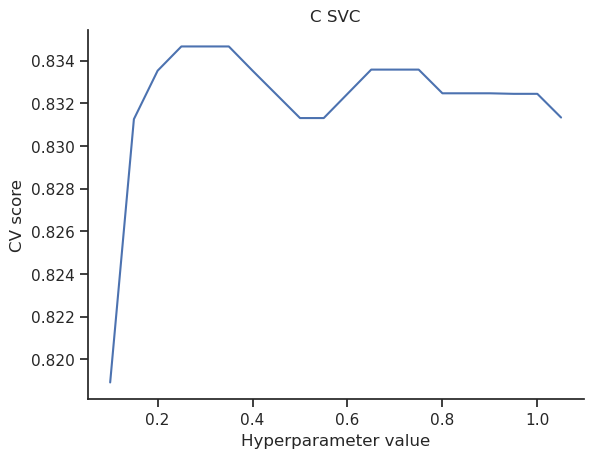

In [60]:
curve = []
hp_vals = np.arange(0.1, 1.1, 0.05)
for val in hp_vals:
    model = make_pipeline(StandardScaler(), SVC(C=val, random_state=42))
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=KFold(n_splits=20, shuffle=True, random_state=42), scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='C SVC', xlabel='Hyperparameter value', ylabel='CV score')
plt.show(block=False)

max value is rbf


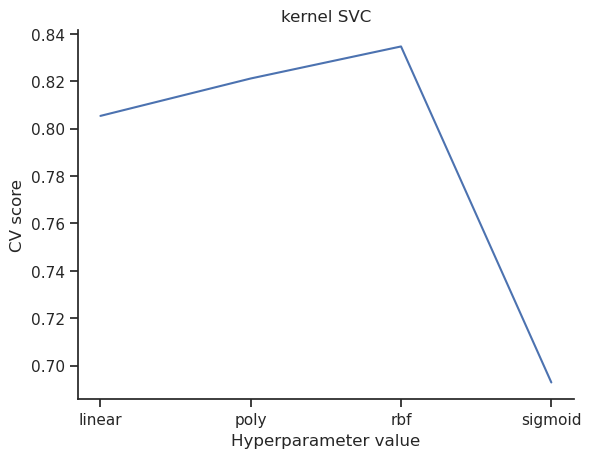

In [61]:
curve = []
hp_vals = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
for val in hp_vals:
    model = make_pipeline(StandardScaler(), SVC(kernel=val, C=0.25, random_state=42))
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=KFold(n_splits=20, shuffle=True, random_state=42), scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='kernel SVC', xlabel='Hyperparameter value', ylabel='CV score')
plt.show(block=False)

count    10.000000
mean      0.834614
std       0.030662
min       0.786517
25%       0.808989
50%       0.837079
75%       0.862360
max       0.876404
dtype: float64


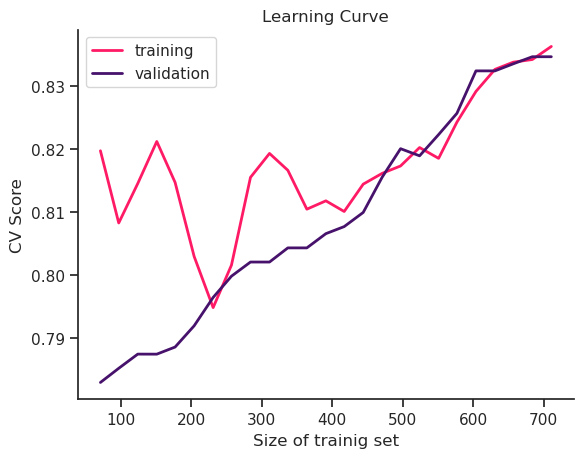

In [62]:
svc_clf = make_pipeline(StandardScaler(), SVC(C=0.25, random_state=42))
                      
cvs(svc_clf); plot_learning_curve(svc_clf)

## Fine Tuning KNeighborsClassifier

count    10.000000
mean      0.723238
std       0.051985
min       0.640449
25%       0.707865
50%       0.719101
75%       0.738764
max       0.842697
dtype: float64


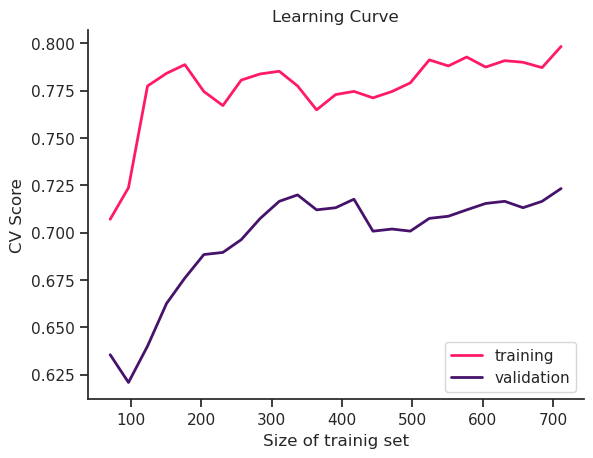

In [63]:
knnc = KNeighborsClassifier()

cvs(knnc); plot_learning_curve(knnc)

max value is 10


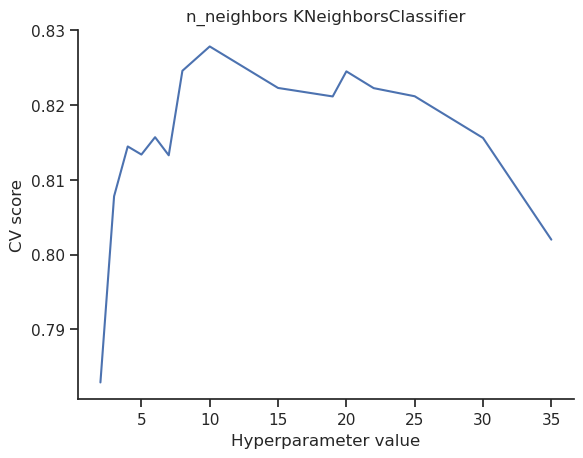

In [64]:
curve = []
hp_vals = [2, 3, 4, 5, 6, 7, 8, 10, 15, 19, 20, 22, 25, 30, 35]
for val in hp_vals:
    model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=val))
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=KFold(n_splits=20, shuffle=True, random_state=42), scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='n_neighbors KNeighborsClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show(block=False)

max value is uniform


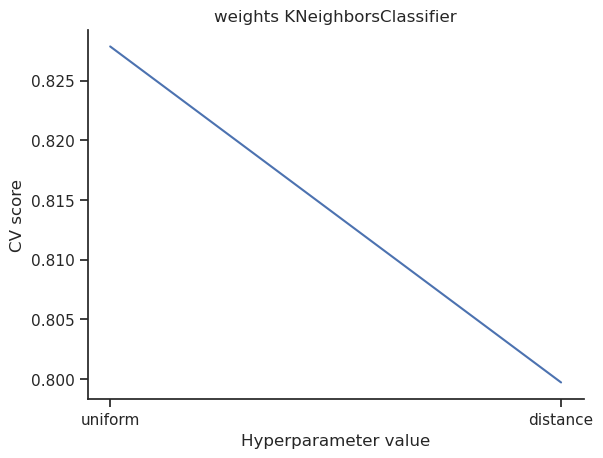

In [65]:
curve = []
hp_vals = ['uniform', 'distance']
for val in hp_vals:
    model = make_pipeline(StandardScaler(), KNeighborsClassifier(weights=val, n_neighbors=10))
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=KFold(n_splits=20, shuffle=True, random_state=42), scoring='accuracy'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='weights KNeighborsClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show(block=False)

count    10.000000
mean      0.822255
std       0.037095
min       0.752809
25%       0.807361
50%       0.814607
75%       0.848315
max       0.887640
dtype: float64


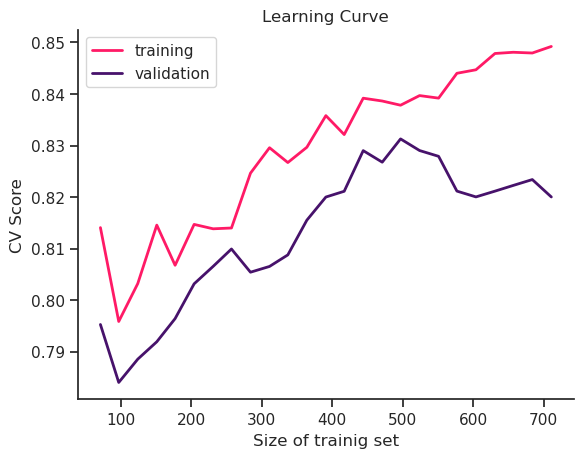

In [66]:
knnc = make_pipeline(StandardScaler(), KNeighborsClassifier(weights='uniform', n_neighbors=10))

cvs(knnc); plot_learning_curve(knnc)

# Final Model and Prediction

| Model                       | **Mean Accuracy** | Standard Deviation | Min Accuracy | 25th Percentile | 50th Percentile | 75th Percentile | Max Accuracy |
|-----------------------------|--------------|--------------------|--------------|-----------------|-----------------|-----------------|--------------|
| CatBoostClassifier        | **0.841394** | 0.027238 | 0.797753 | 0.823034 | 0.841803 | 0.862360 | 0.876404 |
| XGBClassifier             | **0.835751** | 0.031987 | 0.797753 | 0.811287 | 0.831461 | 0.867978 | 0.876404 |
| RandomForestClassifier    | **0.834678** | 0.022278 | 0.797753 | 0.825843 | 0.842697 | 0.842697 | 0.863636 |
| LGBMClassifier            | **0.834665** | 0.027931 | 0.775281 | 0.831461 | 0.842697 | 0.853518 | 0.865169 |
| GradientBoostingClassifier| **0.839160** | 0.022389 | 0.808989 | 0.823034 | 0.842697 | 0.849879 | 0.876404 |
| SVC                       | **0.834614** | 0.030662 | 0.786517 | 0.808989 | 0.837079 | 0.862360 | 0.876404 |
| KNeighborsClassifier      | **0.822255** | 0.037095 | 0.752809 | 0.807361 | 0.814607 | 0.848315 | 0.887640 |
| SGDClassifier             | **0.807623** | 0.028954 | 0.775281 | 0.787506 | 0.797753 | 0.828652 | 0.865169 |
| LogisticRegression        | **0.812142** | 0.035184 | 0.752809 | 0.789326 | 0.813521 | 0.831461 | 0.865169 |


In [67]:
voting_classifier = VotingClassifier(estimators=[('CatBoostClassifier', cb), ('XGBClassifier', xgbc), ('RandomForestClassifier', random_forest),
                                                 ('LGBMClassifier', lgbm), ('GradientBoostingClassifier', gbc), ('SVC', svc_clf)])

voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('CatBoostClassifier',
                              <catboost.core.CatBoostClassifier object at 0x7f84e81134d0>),
                             ('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=0,
                                            gpu_id=None, grow_polic...
                              LGBMClassifier(learning_rate=0.03, max_depth=8,
                                             min_child_weight=5,
                                             

count    10.000000
mean      0.840296
std       0.026751
min       0.797753
25%       0.823034
50%       0.837079
75%       0.864785
max       0.876404
dtype: float64


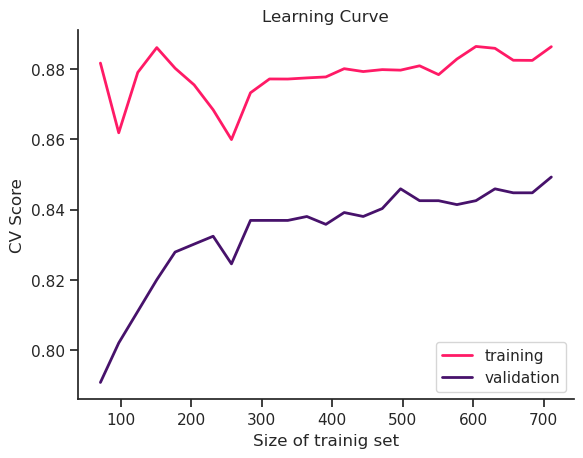

In [68]:
cvs(voting_classifier)
plot_learning_curve(voting_classifier)

In [69]:
# Make predictions on the test set
predictions = voting_classifier.predict(X_test)

# Create a dictionary to hold the PassengerId and predicted survival status
sm_dict = {'PassengerId': p_id, 'Survived': predictions}

# Convert the dictionary to a pandas DataFrame
submission = pd.DataFrame(sm_dict)

# Save the DataFrame to a CSV file without including the index
submission.to_csv('submission.csv', index=False)